In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
%matplotlib notebook

## Isotropic vs Anisotropic Example

<IPython.core.display.Javascript object>


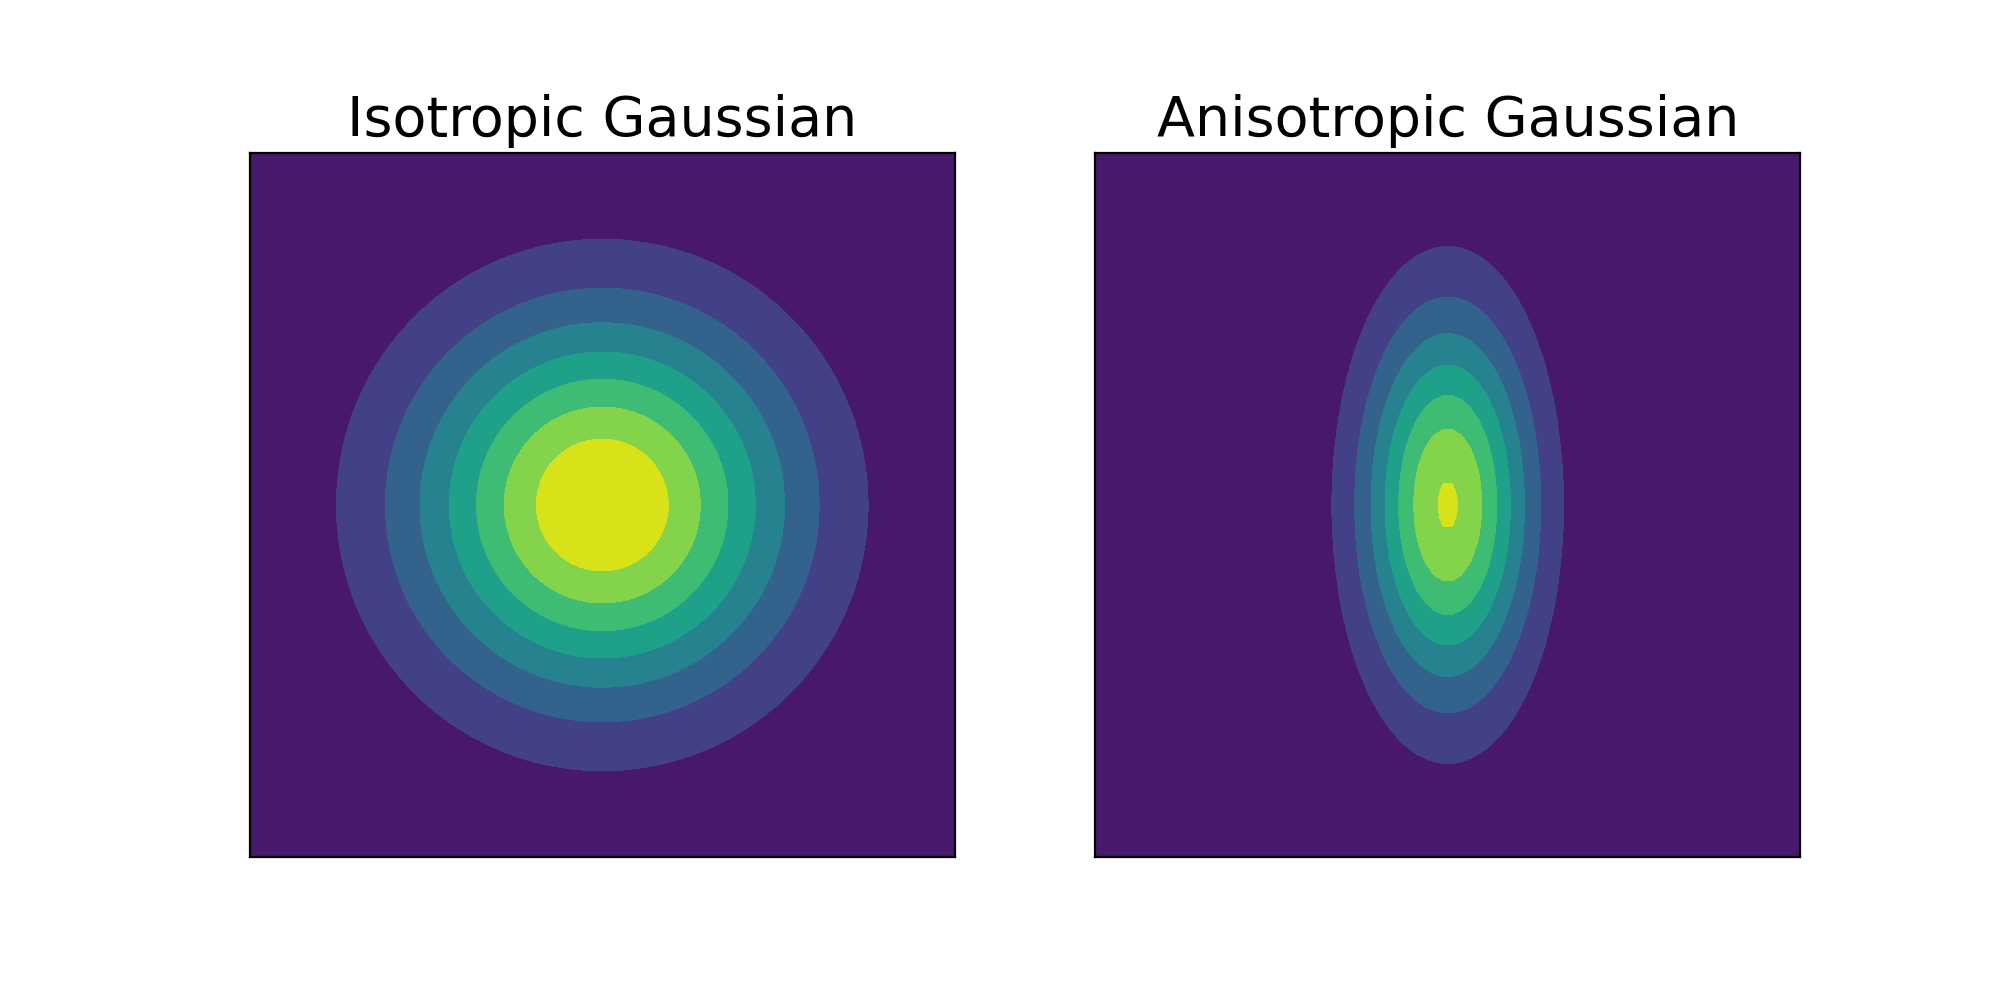

In [2]:
N = 80


X = np.linspace(-2.7, 2.7, N)
Y = np.linspace(-2.7, 2.7, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma1 = np.array([[ 1. , 0], [0,  1.]])

# Pack X and Y into a single 3-dimensional array
pos1 = np.empty(X.shape + (2,))
pos1[:, :, 0] = X
pos1[:, :, 1] = Y

# Anisometric

Sigma2 = np.array([[0.2 , 0], [0.,  1]])

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z1 = multivariate_gaussian(pos1, mu, Sigma1)
Z2 = multivariate_gaussian(pos1, mu, Sigma2)



fig, (ax) = plt.subplots(1, 2, figsize=(10,5))

ax[0].contourf(X, Y, Z1, cmap=cm.viridis)
ax[0].set_box_aspect(1)
ax[0].set_title('Isotropic Gaussian', size=20)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].contourf(X, Y, Z2, cmap=cm.viridis)
ax[1].set_box_aspect(1)
ax[1].set_title('Anisotropic Gaussian', size=20)
ax[1].set_yticks([])
ax[1].set_xticks([])
plt.show()

In [ ]:
fig, (ax) = plt.subplots(1, 2, figsize=(10,5))
fig.subplots_adjust(hspace=0.9)

colors = ['r','b','g']

#ticks
major_ticks = np.arange(0, 331, 33)
minor_ticks = np.arange(0, 331, 11)


for i in range(2):
    ax[0].plot(org[i] + 130 * i, c=colors[i])
    ax[0].set_title('BOLD signal - [Bandpass filtered]')
    ax[0].set_xticks(major_ticks)
    ax[0].set_xticks(minor_ticks, minor=True)
    ax[0].set_yticks([])
    ax[0].grid(which='minor', alpha=0.2)
    ax[0].grid(which='major', alpha=0.5)
    ax[0].margins(x=0.009)

    # plot 2
    ax[1].plot(hil1[i]+ 10 * i, c=colors[i])
    ax[1].set_title(r'$\theta_n(t)$ phase signal - [Hilbert transformation]')
    ax[1].set_xticks(major_ticks)
    ax[1].set_xticks(minor_ticks, minor=True)
    ax[1].set_yticks([])
    ax[1].grid(which='minor', alpha=0.2)
    ax[1].grid(which='major', alpha=0.5)
    ax[1].margins(x=0.009)

fig.subplots_adjust(hspace=0.3)
plt.show()

## Sigma matrixes

In [4]:
sig1 = torch.diag(torch.tensor([1, 1e-3, 1e-3]))
sig2 = torch.eye(3) + 0.9 * (torch.ones(3) - torch.eye(3))
sig3 = torch.diag(torch.tensor([1e-3, 1, 1])) \
       + 0.9 * torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0]])

SIGMAs = torch.stack([sig1, sig2, sig3], dim=0)
print(SIGMAs, '\n-----------')

PIs = [0.6, 0.2, 0.2]
print(PIs)

tensor([[[1.0000, 0.0000, 0.0000],
         [0.0000, 0.0010, 0.0000],
         [0.0000, 0.0000, 0.0010]],

        [[1.0000, 0.9000, 0.9000],
         [0.9000, 1.0000, 0.9000],
         [0.9000, 0.9000, 1.0000]],

        [[0.0010, 0.0000, 0.0000],
         [0.0000, 1.0000, 0.9000],
         [0.0000, 0.9000, 1.0000]]]) 
-----------
[0.6, 0.2, 0.2]
